In [253]:
# Eliminar advertencias
import warnings
warnings.filterwarnings('ignore')

# Importar librerias
import numpy as np
import pandas as pd
df = pd.read_csv('AirQualityUCI.csv', sep=";")
df.drop(['Date'], axis = 1, inplace = True)
df.drop(['Time'], axis = 1, inplace = True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [254]:
# Revisar nulos

print(df.info())

# Revisar atipicos
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int64  
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int64  
 5   NOx(GT)        9357 non-null   int64  
 6   PT08.S3(NOx)   9357 non-null   int64  
 7   NO2(GT)        9357 non-null   int64  
 8   PT08.S4(NO2)   9357 non-null   int64  
 9   PT08.S5(O3)    9357 non-null   int64  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 950.4 KB
None
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048

In [255]:
from sklearn.model_selection import train_test_split


# Configuracion inicial
df_train, df_test = train_test_split(df, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [256]:
from sklearn.preprocessing import MinMaxScaler
#Este minmax scaler es muy bueno, tambien hay unos con promedios y otros escalares
scaler = MinMaxScaler()

# Se aplica a todas las columnas menos a las dummies y a las si/no que discutimos arriba
num_vars = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
7665,0.000000,0.489583,0.000000,0.765643,0.322287,0.000000,0.422130,0.000000,0.361681,0.296364,0.842407,0.897125,0.991684
7563,0.956111,0.550725,0.000000,0.788017,0.452361,0.307921,0.332293,0.631481,0.440000,0.420492,0.856324,0.865258,0.991840
4314,0.949976,0.517663,0.000000,0.778536,0.404722,0.000000,0.374610,0.000000,0.515294,0.305545,0.938191,0.791825,0.994617
9078,0.952808,0.657156,0.000000,0.795980,0.485915,0.306135,0.263267,0.637037,0.496471,0.617701,0.883749,0.855559,0.993139
4829,0.949976,0.496830,0.000000,0.784224,0.434548,0.212627,0.378425,0.537037,0.488403,0.407639,0.887024,0.854174,0.993316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.956583,0.688406,0.366822,0.802427,0.511599,0.228708,0.382241,0.577778,0.645714,0.437385,0.854278,0.951160,0.993136
79,0.957055,0.762681,0.257788,0.803565,0.515742,0.222752,0.374610,0.590741,0.613109,0.635329,0.878428,0.871147,0.993189
8039,0.952336,0.000000,0.000000,0.000000,0.000000,0.283502,0.000000,0.688889,0.000000,0.000000,0.000000,0.000000,0.000000
6936,0.975460,0.776268,0.000000,0.839970,0.637117,0.516974,0.233784,0.694444,0.604370,0.814543,0.860418,0.894700,0.992556


In [257]:
# Dividimos x/y
y_train = df_train.pop('CO(GT)')
X_train = df_train

In [258]:
#Construimos el modelo completo con TODAS las variables

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO(GT)   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     462.9
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:56   Log-Likelihood:                -699.58
No. Observations:                6549   AIC:                             1425.
Df Residuals:                    6536   BIC:                             1513.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2471      0.019     12.756      0.000       0.209       0.285
PT08.S1(CO)      -0.0940      0.104     -0.907      0.364      -0.297       0.109
NMHC(GT)          0.3109      0.039      7.973      0.000       0.234       0.387
C6H6(GT)         -0.7454      0.773     -0.964      0.335      -2.261       0.770
PT08.S2(NMHC)    -0.1350      0.239     -0.566      0.572      -0.603       0.333
NOx(GT)           0.3303      0.059      5.640      0.000       0.216       0.445
PT08.S3(NOx)      0.1826      0.085      2.161      0.031       0.017       0.348
NO2(GT)           0.9459      0.031     31.001      0.000       0.886       1.006
PT08.S4(NO2)      0.0033      0.099      0.033      0.974      -0.191       0.197
PT08.S5(O3)      -0.0805      0.068     -1.192      0.233      -0.213       0.052
T                 0.3254      0.263      1.238      0.216      -0.190       0.841
RH                0.2245      0.123      1.831      0.067      -0.016       0.465
AH                0.1990      0.669      0.297      0.766      -1.113       1.511
==============================================================================
Omnibus:                     1414.246   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5218.549
Skew:                          -1.046   Prob(JB):                         0.00
Kurtosis:                       6.841   Cond. No.                         713.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# Modulo de statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Crear una dataframe con los valores VIF de cada entrada
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,AH,38355.37
2,C6H6(GT),32923.65
9,T,4793.39
3,PT08.S2(NMHC),1155.51
10,RH,975.66
0,PT08.S1(CO),329.73
7,PT08.S4(NO2),271.78
8,PT08.S5(O3),87.66
5,PT08.S3(NOx),85.25
6,NO2(GT),23.55


In [260]:
# Eliminamos PT08.S4(NO2)
X = X_train.drop('PT08.S4(NO2)', 1,)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Miremos como quedo
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     505.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:57   Log-Likelihood:                -699.58
No. Observations:                6549   AIC:                             1423.
Df Residuals:                    6537   BIC:                             1505.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2472      0.019     12.824

In [261]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,C6H6(GT),32566.06
10,AH,29302.65
8,T,1693.96
3,PT08.S2(NMHC),1064.15
9,RH,433.08
0,PT08.S1(CO),327.17
7,PT08.S5(O3),87.66
5,PT08.S3(NOx),77.41
6,NO2(GT),21.97
4,NOx(GT),18.79


In [262]:
#C6H6(GT) tiene un vif alto y ademas un p alto tambien (0.334), debe ser descartado
X = X.drop('C6H6(GT)', 1)
# Otra vez un nuevo modelo
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Imprimir
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     555.5
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:57   Log-Likelihood:                -700.05
No. Observations:                6549   AIC:                             1422.
Df Residuals:                    6538   BIC:                             1497.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2470      0.019     12.817

In [263]:
# De nuevo el vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,AH,3048.63
7,T,1514.05
8,RH,424.60
0,PT08.S1(CO),320.83
2,PT08.S2(NMHC),185.81
6,PT08.S5(O3),87.35
4,PT08.S3(NOx),60.58
5,NO2(GT),21.19
3,NOx(GT),18.13
1,NMHC(GT),1.56


In [264]:
X = X.drop('PT08.S1(CO)', 1)
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     617.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:58   Log-Likelihood:                -700.60
No. Observations:                6549   AIC:                             1421.
Df Residuals:                    6539   BIC:                             1489.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2480      0.019     12.881

In [265]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,AH,3033.62
6,T,1513.36
7,RH,402.73
1,PT08.S2(NMHC),149.57
5,PT08.S5(O3),74.97
3,PT08.S3(NOx),59.23
4,NO2(GT),21.18
2,NOx(GT),18.10
0,NMHC(GT),1.34


In [266]:
X = X.drop('AH', 1)
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     693.5
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:58   Log-Likelihood:                -702.43
No. Observations:                6549   AIC:                             1423.
Df Residuals:                    6540   BIC:                             1484.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2492      0.019     12.951

In [267]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,T,332.87
7,RH,159.63
1,PT08.S2(NMHC),149.29
5,PT08.S5(O3),71.01
3,PT08.S3(NOx),48.08
4,NO2(GT),20.83
2,NOx(GT),18.10
0,NMHC(GT),1.34


In [268]:
X = X.drop('PT08.S3(NOx)', 1)
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     792.0
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:59   Log-Likelihood:                -703.67
No. Observations:                6549   AIC:                             1423.
Df Residuals:                    6541   BIC:                             1478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2498      0.019     12.982

In [269]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,T,245.29
6,RH,149.35
1,PT08.S2(NMHC),132.24
4,PT08.S5(O3),66.92
3,NO2(GT),20.69
2,NOx(GT),17.92
0,NMHC(GT),1.22


In [270]:
X = X.drop('RH', 1)
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     922.2
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:59   Log-Likelihood:                -706.82
No. Observations:                6549   AIC:                             1428.
Df Residuals:                    6542   BIC:                             1475.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2551      0.019     13.331

In [271]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PT08.S2(NMHC),99.67
4,PT08.S5(O3),55.03
5,T,34.98
3,NO2(GT),19.01
2,NOx(GT),16.17
0,NMHC(GT),1.20


In [272]:
X = X.drop('PT08.S5(O3)', 1)
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1106.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:59   Log-Likelihood:                -708.22
No. Observations:                6549   AIC:                             1428.
Df Residuals:                    6543   BIC:                             1469.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2562      0.019     13.397

In [273]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PT08.S2(NMHC),35.02
4,T,33.82
3,NO2(GT),18.41
2,NOx(GT),14.73
0,NMHC(GT),1.20


In [274]:
X = X.drop('PT08.S2(NMHC)', 1)
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     1292.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:35:00   Log-Likelihood:                -808.14
No. Observations:                6549   AIC:                             1626.
Df Residuals:                    6544   BIC:                             1660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3209      0.019     17.011      0.0

In [275]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,NO2(GT),15.34
1,NOx(GT),9.51
3,T,4.41
0,NMHC(GT),1.12


In [276]:
X = X.drop('NOx(GT)', 1)
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     1720.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:35:00   Log-Likelihood:                -810.63
No. Observations:                6549   AIC:                             1629.
Df Residuals:                    6545   BIC:                             1656.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3187      0.019     16.913      0.0

In [277]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,NO2(GT),4.27
2,T,4.22
0,NMHC(GT),1.10


In [278]:
X = X.drop('T', 1)
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2576.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:35:01   Log-Likelihood:                -812.47
No. Observations:                6549   AIC:                             1631.
Df Residuals:                    6546   BIC:                             1651.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2857      0.008     37.040      0.0

In [279]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,NMHC(GT),1.09
1,NO2(GT),1.09


Text(0.5, 0, 'Errors')

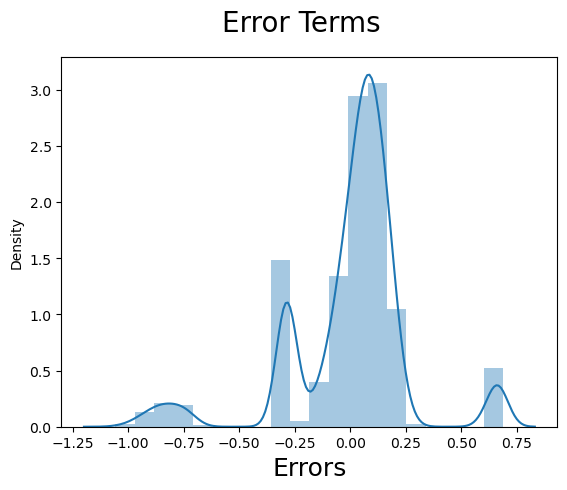

In [280]:
#Verificar con los errores como vimos la clase pasada
import seaborn as sns
import matplotlib.pyplot as plt 
y_train_COGT = lr_10.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_COGT), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [281]:
# Transformación igual que en el set de entrenamiento
num_vars = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
343,0.948561,0.529891,0.196262,0.767918,0.340099,0.144133,0.554977,0.477778,0.487059,0.249357,0.863692,0.895047,0.992769
155,0.946201,0.484149,0.164330,0.764505,0.312345,0.135795,0.575789,0.444444,0.493445,0.318399,0.866967,0.893661,0.992937
5337,0.000000,0.502717,0.000000,0.778157,0.403065,0.000000,0.361429,0.000000,0.505210,0.385971,0.875972,0.958088,0.995002
2532,0.947145,0.495018,0.000000,0.772469,0.371168,0.147707,0.419008,0.470370,0.587563,0.367609,0.909128,0.887426,0.996286
3270,0.951864,0.617301,0.000000,0.788396,0.452775,0.172722,0.314256,0.524074,0.658824,0.432244,0.915677,0.932802,0.998879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8809,0.947617,0.623641,0.000000,0.786879,0.446562,0.291245,0.291710,0.651852,0.478655,0.383401,0.875972,0.858330,0.992717
8339,0.946201,0.501359,0.000000,0.762230,0.290804,0.148898,0.460978,0.461111,0.385546,0.219978,0.834630,0.975061,0.992258
1588,0.951392,0.589221,0.000000,0.795980,0.485501,0.175700,0.374263,0.550000,0.588908,0.441058,0.901351,0.811569,0.992932
2048,0.000000,0.476902,0.000000,0.775502,0.389395,0.000000,0.466875,0.000000,0.580168,0.336026,0.904625,0.866297,0.995069


In [282]:
#Separar x de y
y_test = df_test.pop('CO(GT)')
X_test = df_test

# Añadir variables
X_test_m4 = sm.add_constant(X_test)

# Quitar las mismas variables que quitamos en el training
X_test_m4 = X_test_m4.drop(['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'], axis = 1)

# Hacer predicciones
y_pred_m4 = lr_10.predict(X_test_m4)

In [283]:
from sklearn.metrics import r2_score
#Observar los valores de r2
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.48500388969482544

In [ ]:
#Como la diferencia de los datos de chi-cuadrado del entrenamiento y el testeo fue menor a 0.5 se considera un buen modelo.